In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../lib/')
from frustration_graph import h_transition
import pickle
import os
import copy
import time
import os

In [2]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

In [3]:
res_path = "../../Results/Ising_Frustrated/"
files = os.listdir(res_path + "B/")

L = 20

ratios = np.arange(0, 1, 0.1)
#B = np.arange(0, 1.1, 0.2) 
B = np.arange(0, 1, 0.2)

In [29]:
qpu = DWaveSampler() #'defaults'
sampler = EmbeddingComposite(qpu)

In [30]:
Magnetizations, Chi, Energies = h_transition(L, ratios, B, sampler, num_reads=100)

Computing Phase Transition for B=0.0


100%|██████████| 10/10 [03:16<00:00, 19.64s/it]


Computing Phase Transition for B=0.2


100%|██████████| 10/10 [02:44<00:00, 16.50s/it]


Computing Phase Transition for B=0.4


100%|██████████| 10/10 [02:09<00:00, 12.90s/it]


Computing Phase Transition for B=0.6000000000000001


100%|██████████| 10/10 [04:01<00:00, 24.17s/it]


Computing Phase Transition for B=0.8


100%|██████████| 10/10 [02:33<00:00, 15.38s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


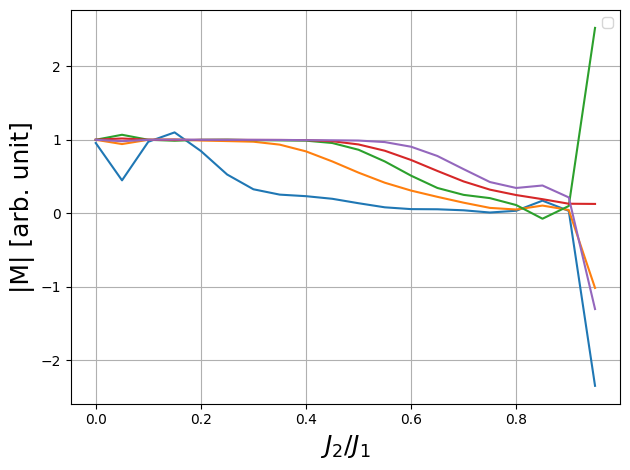

In [29]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

for i, M in enumerate(Magnetizations):
    poly  = lagrange(ratios, M)
    #plt.plot(ratios, M, '-o', label=f"B={B[i]:0.2f}")
    x = np.arange(0, 1, 0.05)
    plt.plot(x, Polynomial(poly.coef[::-1])(x))
plt.legend()
plt.grid()
plt.xlabel(r'$J_2$/$J_1$', fontsize=18)
plt.ylabel('|M| [arb. unit]', fontsize=18)
plt.tight_layout()
#plt.savefig("Phase_transition_B_changing_2.png", transparent=True, dpi=600)

In [31]:
np.savetxt('Magnetizations.dat', Magnetizations.T)

In [32]:
Magnetizations.T

array([[0.955  , 0.99875, 0.99915, 0.99935, 0.99915],
       [0.97175, 0.9988 , 0.9989 , 0.99915, 0.99885],
       [0.84635, 0.9887 , 0.99845, 0.9981 , 0.9989 ],
       [0.3249 , 0.97285, 0.9938 , 0.9968 , 0.9983 ],
       [0.2309 , 0.84105, 0.98705, 0.9946 , 0.99375],
       [0.13495, 0.5515 , 0.8631 , 0.93535, 0.9884 ],
       [0.0547 , 0.3071 , 0.51   , 0.7237 , 0.9043 ],
       [0.0387 , 0.1423 , 0.24865, 0.4315 , 0.5987 ],
       [0.03235, 0.04935, 0.11005, 0.2463 , 0.34265],
       [0.03075, 0.043  , 0.09705, 0.1281 , 0.21425]])